# CS146 Project 2: Discrete and multi-level models

Below is a data set of GP (general practitioner) doctor visits in England*. The data set is stratified by age and geographical region. For each age and region group, 30 people were sampled randomly and asked how often they attended an appointment with a GP during the past year.

## Data

The data set is in a 7 × 10 × 30 array for the 7 geographical regions, 10 age groups, and 30 samples per group. The cell below loads the data and plots the average number of GP visits for each group. You need to use all the data (not just the averages) but the averages should help to give you an idea of what the data set looks like.

In [465]:
# Import libraries
import numpy as np
from numpy import nan  # not-a-number, used to indicated missing data
import matplotlib.pyplot as plt
import pymc as pm
import pandas as pd
import numpy as np
import scipy.stats as sts
import arviz as az
from IPython.display import Image
import random

In [466]:
# Set the random seed for reproducibility
random_seed = 42
# Set the font
font = {'fontname' : 'Times New Roman'}

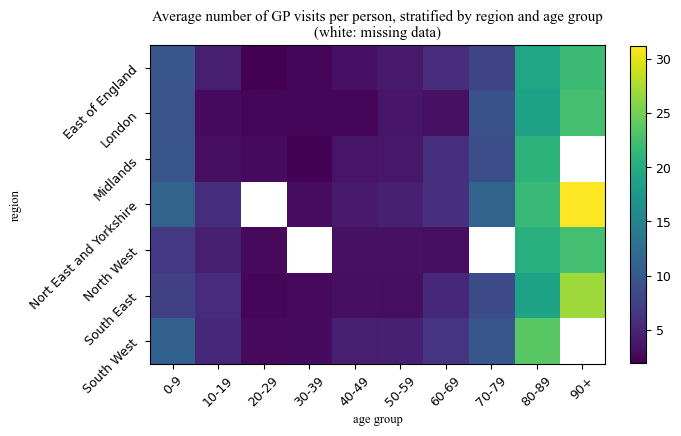

In [467]:
import pandas as pd
regions = ['East of England', 'London', 'Midlands', 'Nort East and Yorkshire', 'North West', 'South East', 'South West']
ages = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
sample_size = 30

raw_data = np.array([
    [[4,11,14,13,12,8,0,8,14,21,17,7,3,9,2,7,23,2,5,12,15,0,14,2,17,7,17,13,11,3],[4,4,10,2,24,1,10,0,0,5,1,3,3,3,0,9,5,0,4,14,3,0,9,1,6,1,5,2,0,4],[0,0,0,1,0,2,1,3,4,4,6,0,1,4,2,2,2,1,4,0,6,2,0,6,0,0,2,1,1,3],[5,0,3,5,3,3,2,3,3,3,3,4,3,7,2,1,0,1,0,2,3,1,5,0,1,1,4,2,4,0],[0,5,6,0,0,0,5,6,0,6,2,3,4,0,0,1,2,7,6,5,6,11,0,7,2,2,4,4,7,0],[9,4,0,5,0,9,2,0,6,1,7,4,10,11,1,0,6,0,14,6,6,2,0,0,0,3,5,3,2,7],[4,2,3,0,20,0,8,5,0,3,8,4,8,8,4,4,6,8,1,11,4,3,6,0,6,2,8,4,21,7],[12,5,5,4,11,17,7,13,0,11,6,0,9,0,0,10,15,3,7,11,9,23,20,0,0,3,27,0,7,4],[22,38,0,10,27,21,0,39,23,11,28,20,12,10,16,0,19,0,29,29,11,47,0,19,29,13,14,23,31,34],[26,75,29,25,43,34,15,10,41,27,0,21,28,8,24,29,0,0,47,0,44,0,20,0,48,0,0,0,30,35]],
    [[6,18,6,5,14,0,7,10,4,12,15,9,2,30,12,0,9,0,14,23,6,5,0,2,11,8,25,0,30,0],[2,0,5,0,13,1,3,0,8,1,0,0,2,6,2,1,0,9,0,0,2,0,6,0,9,2,7,3,2,1],[3,1,0,3,5,2,3,3,7,4,0,2,2,6,1,3,0,4,4,2,2,0,2,2,0,4,2,0,2,1],[2,6,0,1,3,0,2,1,3,0,3,5,0,2,0,1,0,3,4,6,5,7,0,4,0,8,1,3,2,0],[5,0,0,0,9,0,0,2,2,4,1,9,5,1,1,0,0,4,2,4,3,6,0,4,6,0,0,2,5,0],[6,0,7,6,0,7,1,3,2,0,2,4,2,0,4,7,2,1,7,2,7,4,9,1,0,8,5,3,4,7],[9,8,3,5,1,7,4,4,0,6,1,0,0,6,2,0,0,0,7,5,0,10,0,6,0,6,5,2,0,2],[0,0,0,10,7,13,10,0,24,20,6,14,0,2,1,10,20,20,11,9,9,0,7,6,9,16,7,18,24,4],[19,28,38,30,19,25,46,6,13,0,21,9,13,14,13,0,21,40,6,25,8,22,15,28,0,17,14,35,25,13],[30,46,16,0,48,0,14,0,0,0,20,0,16,23,29,30,15,26,40,22,29,61,37,28,50,12,21,9,15,41]],
    [[12,7,0,0,17,9,19,13,9,8,8,8,9,0,21,9,26,0,0,15,0,6,19,0,0,12,9,21,16,12],[2,2,4,0,4,6,7,0,7,0,5,0,0,9,6,2,0,0,4,4,2,6,3,0,0,8,0,7,3,0],[1,0,5,4,2,0,2,5,5,1,3,4,0,14,1,1,0,2,5,2,0,3,5,7,3,0,0,5,1,3],[0,4,2,2,3,0,0,2,4,0,0,1,1,3,0,5,7,0,3,0,2,1,2,2,0,9,4,0,2,5],[3,0,0,3,8,2,5,0,8,3,3,8,2,3,3,0,17,11,5,9,1,2,2,1,1,2,0,0,0,5],[4,5,9,9,3,10,0,8,3,0,2,5,2,0,4,4,1,0,6,15,0,5,5,0,0,2,9,2,0,0],[0,5,8,10,1,0,0,0,1,3,4,8,3,6,5,13,5,13,10,7,20,26,7,0,0,5,11,0,1,3],[14,5,5,0,11,13,9,22,0,8,10,20,0,0,8,5,8,16,11,0,17,0,8,1,7,33,3,15,0,20],[25,30,31,52,0,39,16,20,20,22,12,0,19,24,0,10,29,28,24,0,29,0,20,0,49,37,20,48,0,23],[nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan]],
    [[0,21,14,4,0,17,13,0,14,0,15,32,15,6,0,14,0,17,24,10,16,9,19,9,10,9,17,13,0,19],[12,5,7,2,4,1,0,7,8,11,1,3,6,3,11,0,4,5,4,7,22,7,0,2,0,2,17,8,8,6],[nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan],[2,2,2,1,4,5,4,3,2,1,2,1,2,2,5,2,2,6,5,3,3,6,1,0,4,0,2,5,4,5],[6,0,2,10,7,0,8,14,3,0,3,3,8,9,2,7,0,4,0,5,5,2,2,3,4,10,0,0,5,0],[6,4,0,4,5,9,1,4,5,6,9,0,3,1,5,14,0,6,6,10,7,8,2,0,4,0,3,12,0,0],[1,12,2,2,4,10,13,0,4,9,12,8,5,5,3,2,2,5,6,7,6,2,7,6,1,14,8,6,8,8],[15,0,18,19,12,0,11,10,33,18,10,6,16,7,8,15,17,12,13,8,5,22,16,8,19,6,0,18,0,0],[62,0,0,29,22,0,39,23,28,0,21,30,18,0,47,0,15,0,16,0,27,0,30,28,45,58,18,48,30,15],[41,31,40,16,37,63,63,0,44,28,29,39,22,18,39,59,13,31,0,49,53,27,33,0,46,64,24,0,0,27]],
    [[0,8,0,12,14,3,4,9,0,0,5,0,30,5,0,1,21,8,0,5,0,11,17,3,13,3,18,13,0,0],[6,5,1,0,0,0,12,7,4,7,0,8,0,7,4,4,0,2,12,7,3,8,4,4,5,8,2,10,0,5],[3,4,4,3,4,2,0,9,2,0,4,6,4,2,6,0,2,0,0,0,3,0,2,2,7,2,0,1,1,6],[nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan],[3,11,3,5,4,4,7,0,0,4,1,0,0,5,0,2,10,4,5,0,5,7,4,6,1,0,0,3,1,4],[0,4,4,3,0,0,4,6,4,7,2,0,0,5,5,0,8,0,8,5,0,4,0,0,5,15,7,2,0,1],[0,5,12,5,4,5,5,4,8,1,4,0,0,4,0,3,6,0,0,0,0,0,1,0,12,0,8,0,1,3],[nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan],[41,7,2,31,20,14,26,29,8,0,25,20,21,30,18,0,10,0,32,18,6,33,43,13,31,24,22,39,44,0],[29,0,20,29,26,40,29,0,42,19,8,32,29,22,30,24,29,35,0,46,39,35,19,13,9,5,14,18,0,34]],
    [[6,16,0,10,9,4,24,6,0,10,7,5,5,11,11,12,0,0,0,8,14,5,0,8,7,0,26,0,0,20],[7,0,8,2,3,13,11,5,7,7,0,0,4,0,3,15,3,8,8,5,12,1,4,14,11,4,6,0,5,3],[6,4,2,4,4,0,1,3,2,3,2,1,6,0,2,1,2,0,2,2,2,2,2,5,0,3,2,2,6,2],[0,4,4,0,1,4,2,3,4,2,4,5,0,4,0,0,3,0,0,1,1,4,7,4,2,4,6,3,3,4],[4,3,3,0,5,2,1,3,7,5,0,0,0,1,4,3,4,1,6,0,6,9,0,5,6,0,6,0,5,4],[6,1,3,4,6,0,0,7,5,2,0,7,0,2,0,5,0,5,2,0,0,3,8,6,2,5,1,5,2,3],[10,3,1,9,12,9,1,0,6,0,1,0,5,4,2,0,9,0,1,3,0,5,22,6,14,11,9,6,5,4],[9,0,7,12,9,14,13,14,12,13,0,10,8,5,5,8,8,0,28,0,0,23,0,0,14,7,17,0,8,17],[7,62,0,0,16,0,0,30,18,22,12,0,24,0,13,0,0,7,9,0,67,29,49,34,31,40,26,25,25,21],[28,39,0,33,32,23,0,20,36,16,20,0,24,60,17,28,48,84,16,57,29,35,14,0,0,67,25,19,37,0]],
    [[14,0,34,16,0,4,8,22,11,0,13,17,18,14,35,9,10,9,13,10,12,7,6,20,11,12,0,0,7,0],[5,12,0,10,8,0,7,0,6,0,20,0,10,0,3,6,9,8,7,0,3,7,10,5,7,5,3,0,8,0],[9,3,3,0,2,0,4,8,5,1,0,4,3,3,3,0,0,1,5,2,2,12,0,1,4,2,1,0,2,0],[3,0,5,0,0,1,1,3,1,1,1,3,4,4,4,8,5,0,0,12,0,1,0,4,4,5,1,9,3,1],[8,2,11,0,8,0,0,5,7,4,10,0,13,2,0,0,0,5,3,0,8,4,7,2,3,5,3,8,3,11],[5,2,5,4,10,2,10,4,14,3,3,2,2,13,8,2,3,9,0,0,6,2,5,6,0,0,3,2,7,4],[0,6,3,8,0,5,3,10,5,8,17,13,0,8,2,6,6,2,5,10,8,6,10,0,7,5,4,8,9,20],[20,16,16,20,11,3,13,1,0,0,0,3,5,9,0,21,10,13,8,22,19,7,19,21,4,0,2,10,0,19],[12,0,33,20,36,35,16,26,12,51,0,37,0,15,41,35,37,30,11,32,33,18,45,22,19,0,43,19,14,19],[nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan]]])

plt.rcParams.update({'font.size': 9})

plt.figure()
plt.title('Average number of GP visits per person, stratified by region and age group\n(white: missing data)', font)
plt.xlabel('age group', font)
plt.ylabel('region', font)
plt.imshow(raw_data.mean(axis=2))
plt.colorbar(fraction=0.032)
plt.xticks(range(len(ages)), ages, rotation=45)
plt.yticks(range(len(regions)), regions, rotation=45)
plt.show()

## Data pre-processing

To make the data easier to work with in PyMC I will reorganize the raw data into 3 numpy arrays: `Region`, `Age`, and `Counts`. Region array will be an integer from 0-6 indicating which geographical region each count is from, the Age array is an integer for each age category, and  Count array is number of GP visits. Each array will have the same length and the i-th element of each array will correspond to the same person.

In [468]:
# Get the shape of the raw_data array
num_regions, num_ages, num_samples = raw_data.shape

# Initialize empty lists for the region index, age index, and counts
region_index = []
age_index = []
counts = []

# Iterate over each region, age, and sample
for region in range(num_regions):
    for age in range(num_ages):
        for sample in range(num_samples):
            # Append the region index, age index, and count to the respective lists
            region_index.append(region)
            age_index.append(age)
            counts.append(raw_data[region, age, sample])

# Convert the lists to numpy arrays
region_index = np.array(region_index)
age_index = np.array(age_index)
counts = np.array(counts)

Now let's remove the NaN values and look at the dataframe below.  

In [469]:
# Create a dictionary with the column names and values
data = {'Region': region_index, 'Age': age_index, 'Counts': counts}
# Create a DataFrame from the dictionary
df = pd.DataFrame(data)
# Display the DataFrame
df
# Create second DataFrame without NaN values
df2 = df.dropna()
df2.reset_index(drop=True, inplace=True)
df2

,Region,Age,Counts
0,0,0,4.0
1,0,0,11.0
2,0,0,14.0
3,0,0,13.0
4,0,0,12.0
...,...,...,...
1945,6,8,0.0
1946,6,8,43.0
1947,6,8,19.0
1948,6,8,14.0


After pre-processing and removing the NaNs from the data which had a shape 7 × 10 × 30 now has a shape of 1950 × 3 and is ready to be modeled using PyMC.

Mean number of GP visits: 8
Median number of GP visits: 4.0
Mode: ModeResult(mode=array([0.]), count=array([447]))
Standard deviation: 11
95% Interval: [ 0. 40.]
Range: 0.0 to 84.0


/var/folders/ws/y4s13dw95dd92p32p0mgjt600000gn/T/ipykernel_7967/3056213312.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(f'Mode: {sts.mode(df2.Counts)}')


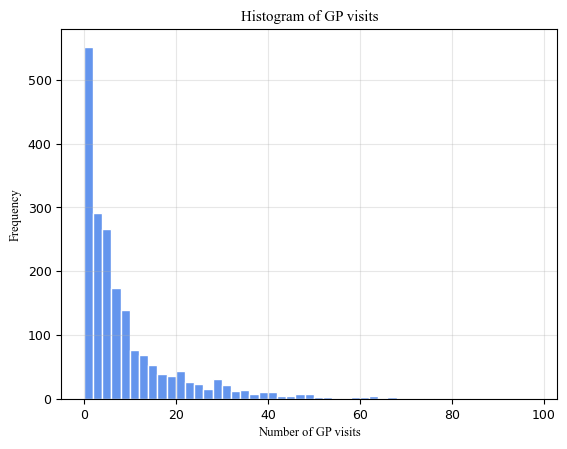

In [470]:
# Count Histogram
plt.hist(counts, edgecolor='white', bins=range(0, 100, 2), color='cornflowerblue')
plt.xlabel('Number of GP visits', font)
plt.ylabel('Frequency', font)
plt.title('Histogram of GP visits', font)
plt.grid(alpha=0.3)
# Summary statistics
print(f'Mean number of GP visits: {round(np.mean(df2.Counts))}')
print(f'Median number of GP visits: {np.median(df2.Counts)}')
print(f'Mode: {sts.mode(df2.Counts)}')
print(f'Standard deviation: {round(np.std(df2.Counts))}')
print(f'95% Interval: {np.percentile(df2.Counts, [2.5, 97.5])}')
print(f'Range: {np.min(df2.Counts)} to {np.max(df2.Counts)}')

## Model

We will use a Zero-Inflated Poisson likelihood function for this data set. The motivation for making it zero-inflated is that there are many more 0s in the data set than we would expect from a Poisson distribution since a lot of people never visit the doctor. This might be because they don't like doctors, don't take their health seriously, procrastinate, etc. We suspect that those people who do sometimes visit a doctor, follow a Poisson distribution for the number of appointments in a year.

## Complete pooling

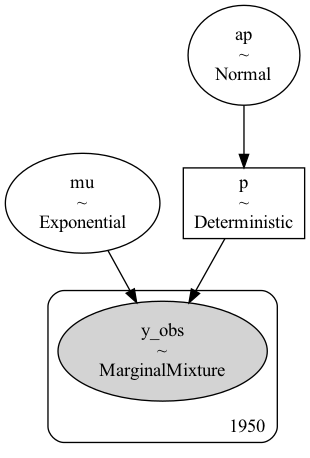

In [471]:
# Prior predictive
with pm.Model() as complete_model:
    # Priors
    mu = pm.Exponential('mu', lam=0.1) # Prior for rate in Poisson
    ap = pm.Normal('ap', mu=0, sigma=1) # Prior for ZIP alpha
    p = pm.Deterministic('p', pm.math.invlogit(ap)) # Probability of extra zeros
    # ZIP Likelihood
    y_obs = pm.ZeroInflatedPoisson('y_obs', psi=p, mu=mu, observed=df2['Counts'])
# Visualize the model
Image(pm.model_to_graphviz(complete_model).render(format='png'))

In [472]:
# Prior predictive samples
with complete_model:
    pp = pm.sample_prior_predictive(random_seed=random_seed)

Sampling: [ap, mu, y_obs]


Mean number of predicted visits = 5
Prior-predictive 95% interval = [ 0. 29.]
standard deviation = 8
Mode : ModeResult(mode=array([0]), count=array([529382]))
Standard deviation: 8
Proportion of zeros: 0.54
Maximum number of visits: 68
Minimum number of visits: 0


/var/folders/ws/y4s13dw95dd92p32p0mgjt600000gn/T/ipykernel_7967/2885481975.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(f'Mode : {sts.mode(predicted_counts)}')


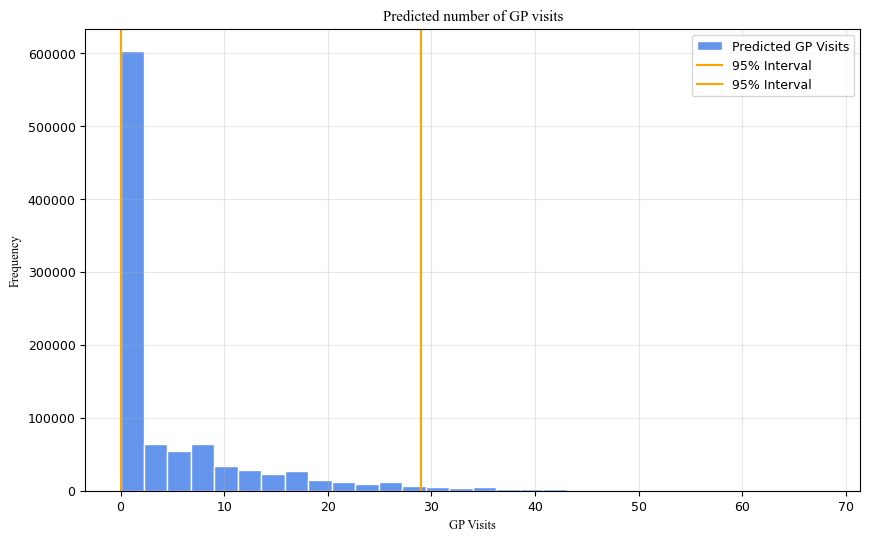

In [473]:
predicted_counts = pp.prior_predictive.y_obs.values.flatten()
# Mean number of visits and 95% interval
print(f'Mean number of predicted visits = {round(np.mean(predicted_counts))}')
print(f'Prior-predictive 95% interval = {np.percentile(predicted_counts, (2.5, 97.5))}')
print(f'standard deviation = {round(np.std(predicted_counts))}')
print(f'Mode : {sts.mode(predicted_counts)}')
print(f'Standard deviation: {round(np.std(predicted_counts))}')
print(f'Proportion of zeros: {round(np.mean(predicted_counts == 0), 2)}')
print(f'Maximum number of visits: {np.max(predicted_counts)}')
print(f'Minimum number of visits: {np.min(predicted_counts)}')
# Visualize the prior predictive 
plt.figure(figsize=(10,6))
plt.hist(predicted_counts, edgecolor='white', bins=30, color='cornflowerblue', label='Predicted GP Visits')
plt.axvline(np.percentile(predicted_counts,(2.5)),color='orange',label='95% Interval')
plt.axvline(np.percentile(predicted_counts,(97.5)),color='orange',label='95% Interval')
plt.title('Predicted number of GP visits', font)
plt.xlabel('GP Visits', font)
plt.ylabel('Frequency', font)
plt.legend()
plt.grid(alpha=0.3)

In [474]:
# Posterior
with complete_model: 
    inference = pm.sample(random_seed=random_seed)
    pm.sample_posterior_predictive(inference, random_seed=random_seed, extend_inferencedata=True)
    pm.compute_log_likelihood(inference)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, ap]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
Sampling: [y_obs]


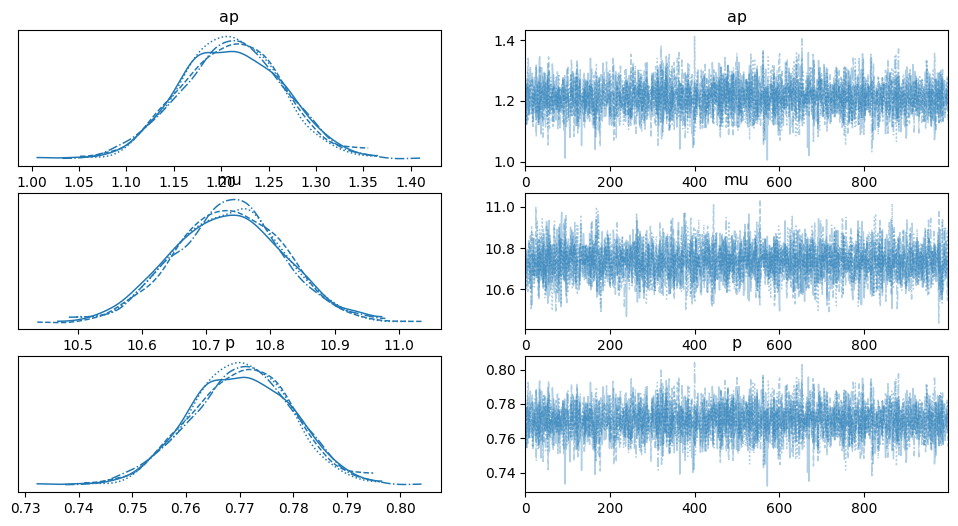

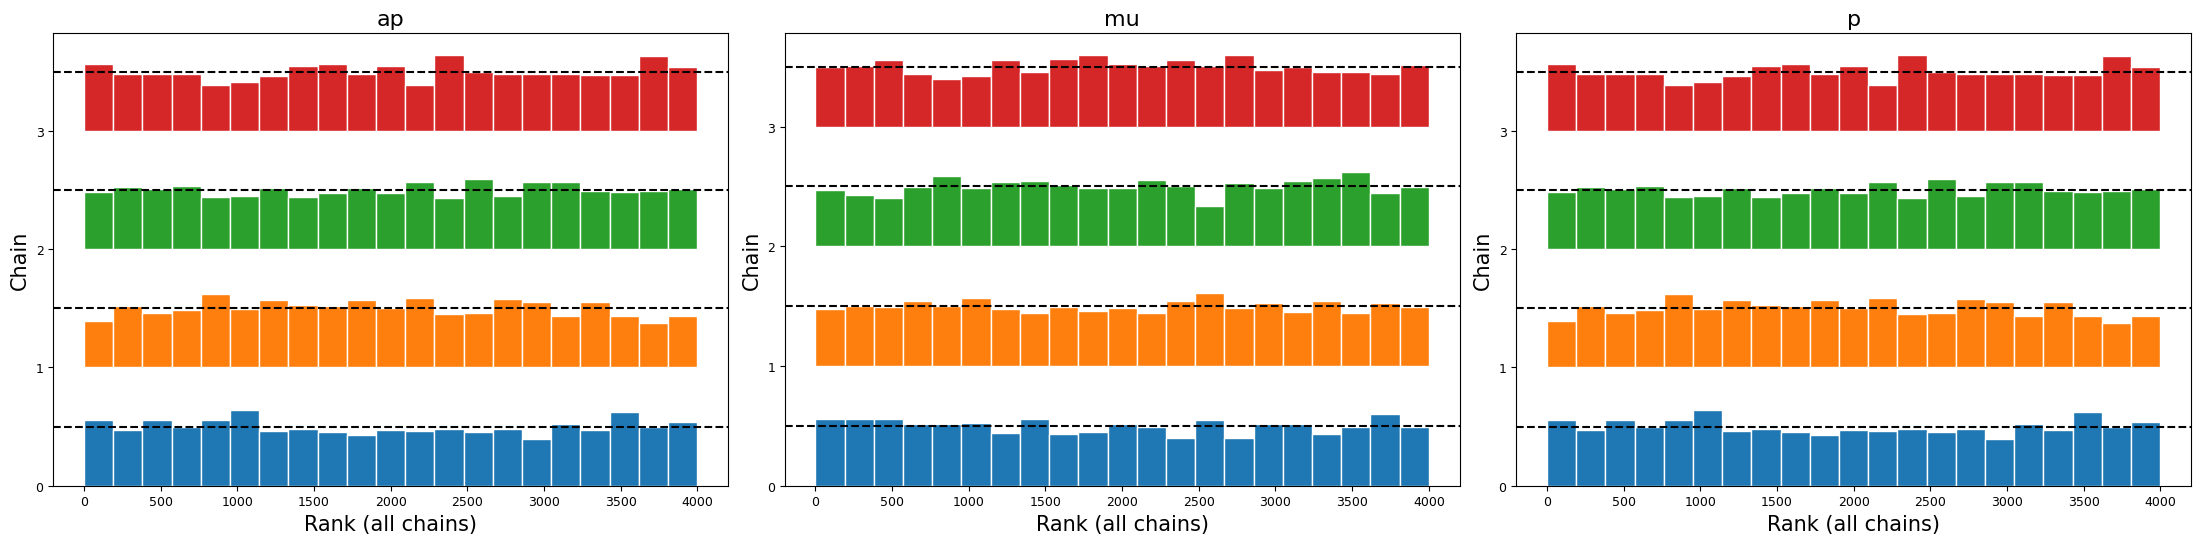

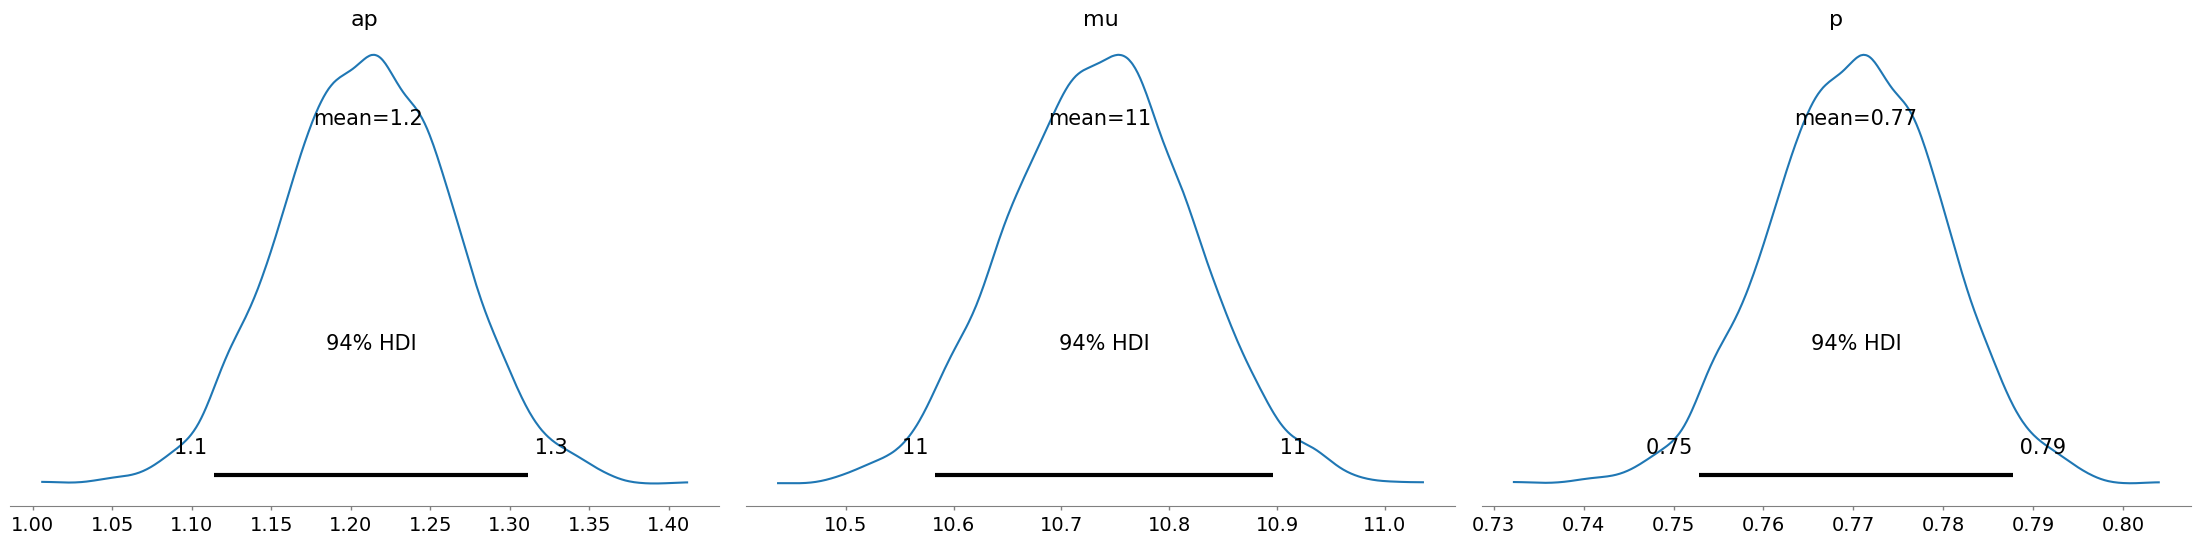

In [475]:
# Check if the sampler worked
az.plot_trace(inference, compact=True)
az.plot_rank(inference)
plt.tight_layout()
pm.plot_posterior(inference)
plt.tight_layout()
plt.show()

In [476]:
az.summary(inference)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ap,1.211,0.054,1.114,1.312,0.001,0.001,4090.0,3119.0,1.0
mu,10.735,0.085,10.583,10.897,0.001,0.001,4236.0,2765.0,1.0
p,0.770,0.010,0.753,0.788,0.000,0.000,4090.0,3119.0,1.0


Proportion of zeros in the data: 0.23
Proportion of zeros in the posterior predictive samples: 0.23
Mean number of counts in the data: 8.27
Mean number of counts in the posterior predictive samples: 8.27


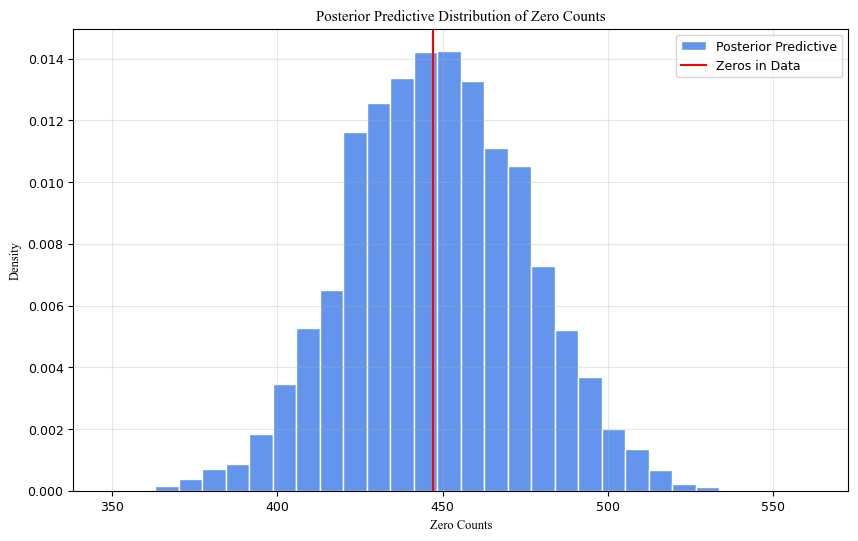

In [477]:
# Code modified from Session 8.2 Codebook: "Poisson vs Zero-Inflated-Poisson"
# Posterior predictive samples
posterior_samples_zeros = (inference.posterior_predictive.y_obs.values == 0).sum(axis=2).flat 
# Calculate the number of zeros in posterior samples
posterior_zeros_count = (posterior_samples == 0).sum()
# Assess the model performance
proportion_zeros_post = (posterior_samples == 0).mean()
proportion_zeros_data = (df2['Counts'] == 0).mean()
print(f'Proportion of zeros in the data: {round(proportion_zeros_data, 2)}')
print(f'Proportion of zeros in the posterior predictive samples: {round(proportion_zeros_post, 2)}')
print(f'Mean number of counts in the data: {round(df2.Counts.mean(),2)}')
print(f'Mean number of counts in the posterior predictive samples: {round(posterior_samples.mean(),2)}')
plt.figure(figsize=(10,6))
plt.title('Posterior Predictive Distribution of Zero Counts', font)
plt.hist(posterior_samples_zeros, color='cornflowerblue', edgecolor='white', bins=30, density=True, label='Posterior Predictive')
plt.axvline((df2['Counts'] == 0).sum(), color='red', label='Zeros in Data')
plt.xlabel('Zero Counts', font)
plt.ylabel('Density', font)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

False


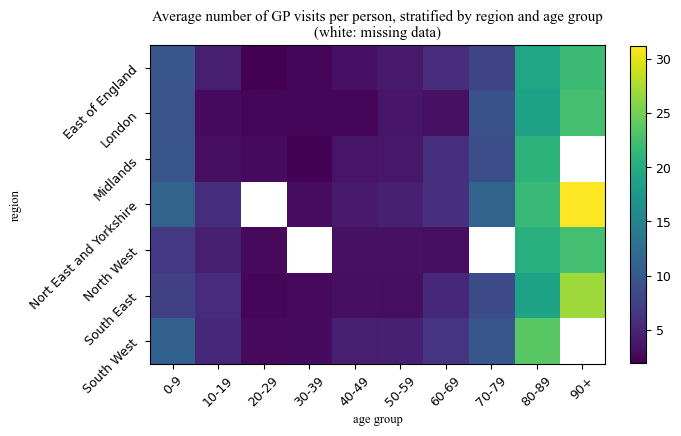

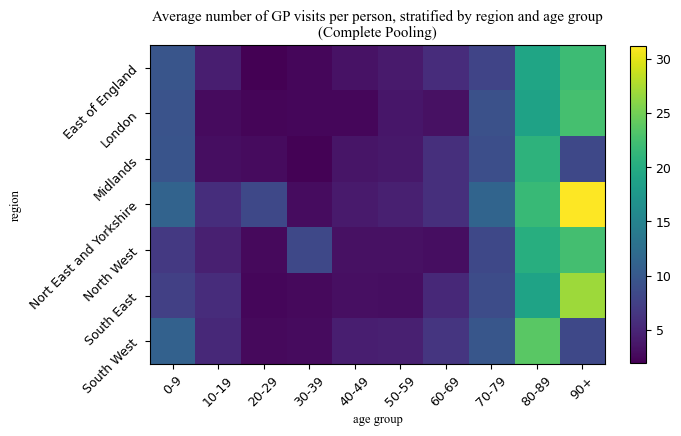

In [478]:

# Find and fill in the NA values by sampling random values from posterior predictive
# Now we can re-aggregate the data and visualize the results with predicted values
# Replace the missing values with the sampled values
filled_data = raw_data.copy()
filled_data[np.isnan(filled_data)] = np.mean(inference.posterior_predictive.y_obs.values)
# If it worked correctly there won't be  any NaN values
print(np.isnan(filled_data).any())

# Visaulize the original raw data

plt.figure()
plt.title('Average number of GP visits per person, stratified by region and age group\n(white: missing data)', font)
plt.xlabel('age group', font)
plt.ylabel('region', font)
plt.imshow(raw_data.mean(axis=2))
plt.colorbar(fraction=0.032)
plt.xticks(range(len(ages)), ages, rotation=45)
plt.yticks(range(len(regions)), regions, rotation=45)
plt.show()

# Visualize the filled data code adapted from this jupyter notebook
plt.figure()
plt.title('Average number of GP visits per person, stratified by region and age group\n(Complete Pooling)', font)
plt.xlabel('age group', font)
plt.ylabel('region', font)
plt.imshow(filled_data.mean(axis=2))
plt.colorbar(fraction=0.032)
plt.xticks(range(len(ages)), ages, rotation=45)
plt.yticks(range(len(regions)), regions, rotation=45)
plt.show()

# Partial pooling

In [479]:
# Create Age and Region clusters
df2['Cluster'] = df2.groupby(['Region', 'Age']).ngroup().add(1)
df2 # 65 Total clusters

/var/folders/ws/y4s13dw95dd92p32p0mgjt600000gn/T/ipykernel_7967/1277829195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cluster'] = df2.groupby(['Region', 'Age']).ngroup().add(1)


,Region,Age,Counts,Cluster
0,0,0,4.0,1
1,0,0,11.0,1
2,0,0,14.0,1
3,0,0,13.0,1
4,0,0,12.0,1
...,...,...,...,...
1945,6,8,0.0,65
1946,6,8,43.0,65
1947,6,8,19.0,65
1948,6,8,14.0,65


65


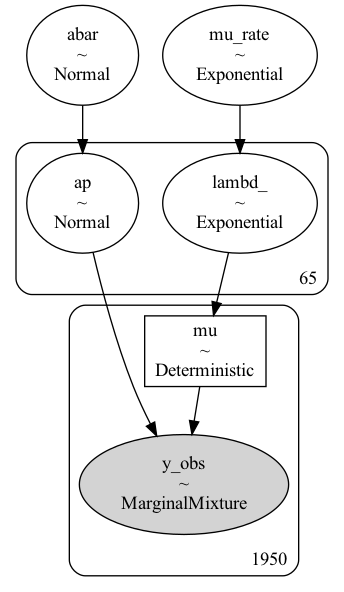

In [480]:
num_clusters = df2['Cluster'].nunique()
print(num_clusters) # 65 clusters
# Convert cluster indices to tensor
cluster_idx = df2['Cluster'].values - 1
with pm.Model() as partial_model:
    # Hyperpriors
    mu_rate = pm.Exponential('mu_rate', lam=2.5)
    lambd_ = pm.Exponential('lambd_', lam=mu_rate, shape=num_clusters)
    abar = pm.Normal('abar', mu=0, sigma=1)
    # Priors
    ap = pm.Normal('ap', mu=abar, sigma=1, shape=num_clusters)
    p = pm.math.invlogit(ap[cluster_idx])
    mu = pm.Deterministic('mu', lambd_[cluster_idx])
    # Likelihood
    y_obs = pm.ZeroInflatedPoisson('y_obs', psi=p, mu=mu, observed=df2['Counts'])
# Visualize the model
Image(pm.model_to_graphviz(partial_model).render(format='png'))

In [481]:
with partial_model:
    pp_partial = pm.sample_prior_predictive(random_seed=random_seed)

Sampling: [abar, ap, lambd_, mu_rate, y_obs]


Mean number of predicted visits = 6
Prior-predictive 95% interval = [ 0. 42.]
Median: 0.0
Mode : ModeResult(mode=array([0]), count=array([612776]))
Standard deviation: 37
Proportion of zeros: 0.63
Maximum number of visits: 2678
Minimum number of visits: 0


/var/folders/ws/y4s13dw95dd92p32p0mgjt600000gn/T/ipykernel_7967/4192806869.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(f'Mode : {sts.mode(predicted_counts)}')


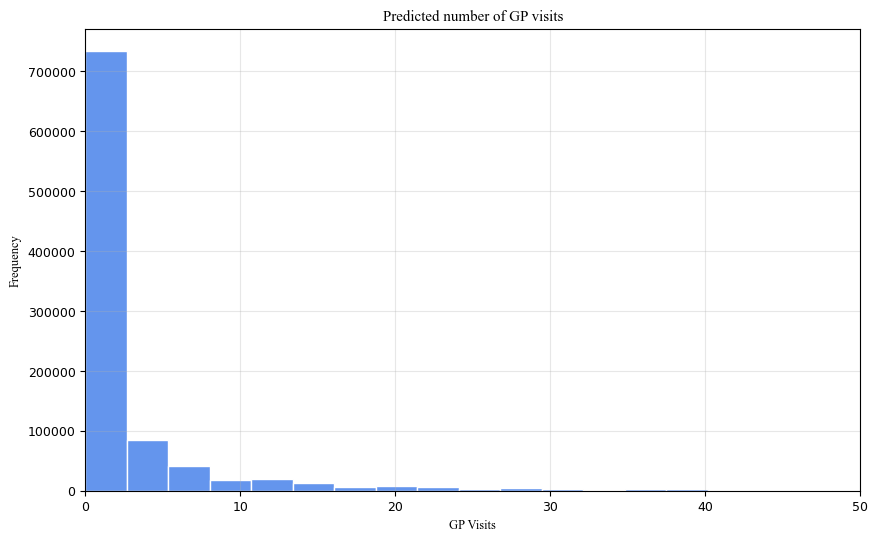

In [482]:
predicted_counts = pp_partial.prior_predictive.y_obs.values.flatten()
# Mean number of visits and 95% interval
print(f'Mean number of predicted visits = {round(np.mean(predicted_counts))}')
print(f'Prior-predictive 95% interval = {np.percentile(predicted_counts, (2.5, 97.5))}')
print(f'Median: {np.median(predicted_counts)}')
print(f'Mode : {sts.mode(predicted_counts)}')
print(f'Standard deviation: {round(np.std(predicted_counts))}')
print(f'Proportion of zeros: {round(np.mean(predicted_counts == 0), 2)}')
print(f'Maximum number of visits: {np.max(predicted_counts)}')
print(f'Minimum number of visits: {np.min(predicted_counts)}')
# Visualize the prior predictive 
plt.figure(figsize=(10,6))
plt.hist(predicted_counts, edgecolor='white', bins=1000, color='cornflowerblue')
plt.xlim(0, 50)
plt.title('Predicted number of GP visits', font)
plt.xlabel('GP Visits', font)
plt.ylabel('Frequency', font)
plt.grid(alpha=0.3)

In [483]:
with partial_model: 
    inference_partial = pm.sample(random_seed=random_seed)
    pm.sample_posterior_predictive(inference_partial, random_seed=random_seed, extend_inferencedata=True)
    pm.compute_log_likelihood(inference_partial)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_rate, lambd_, abar, ap]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 104 seconds.
Sampling: [y_obs]


/Users/giorgikukishvili/anaconda3/lib/python3.11/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (67) in plot_rank, generating only 40 plots
  warnings.warn(


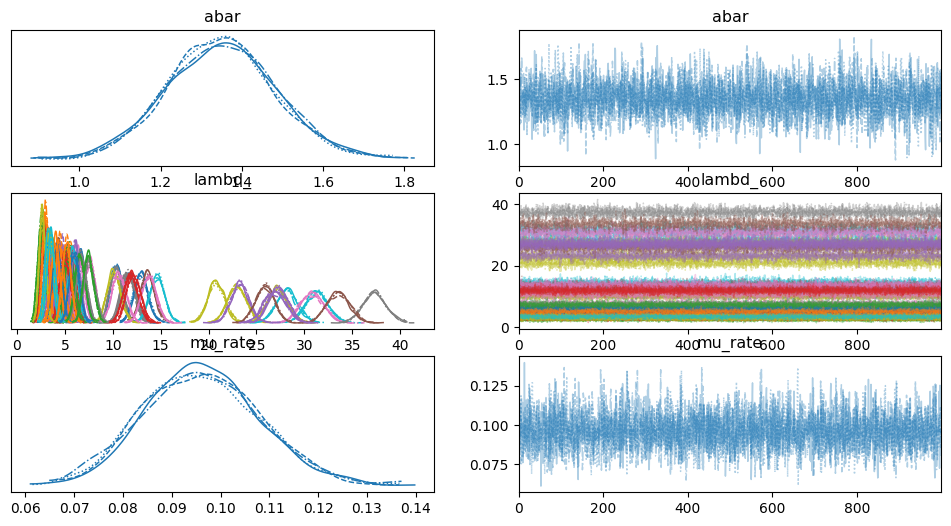

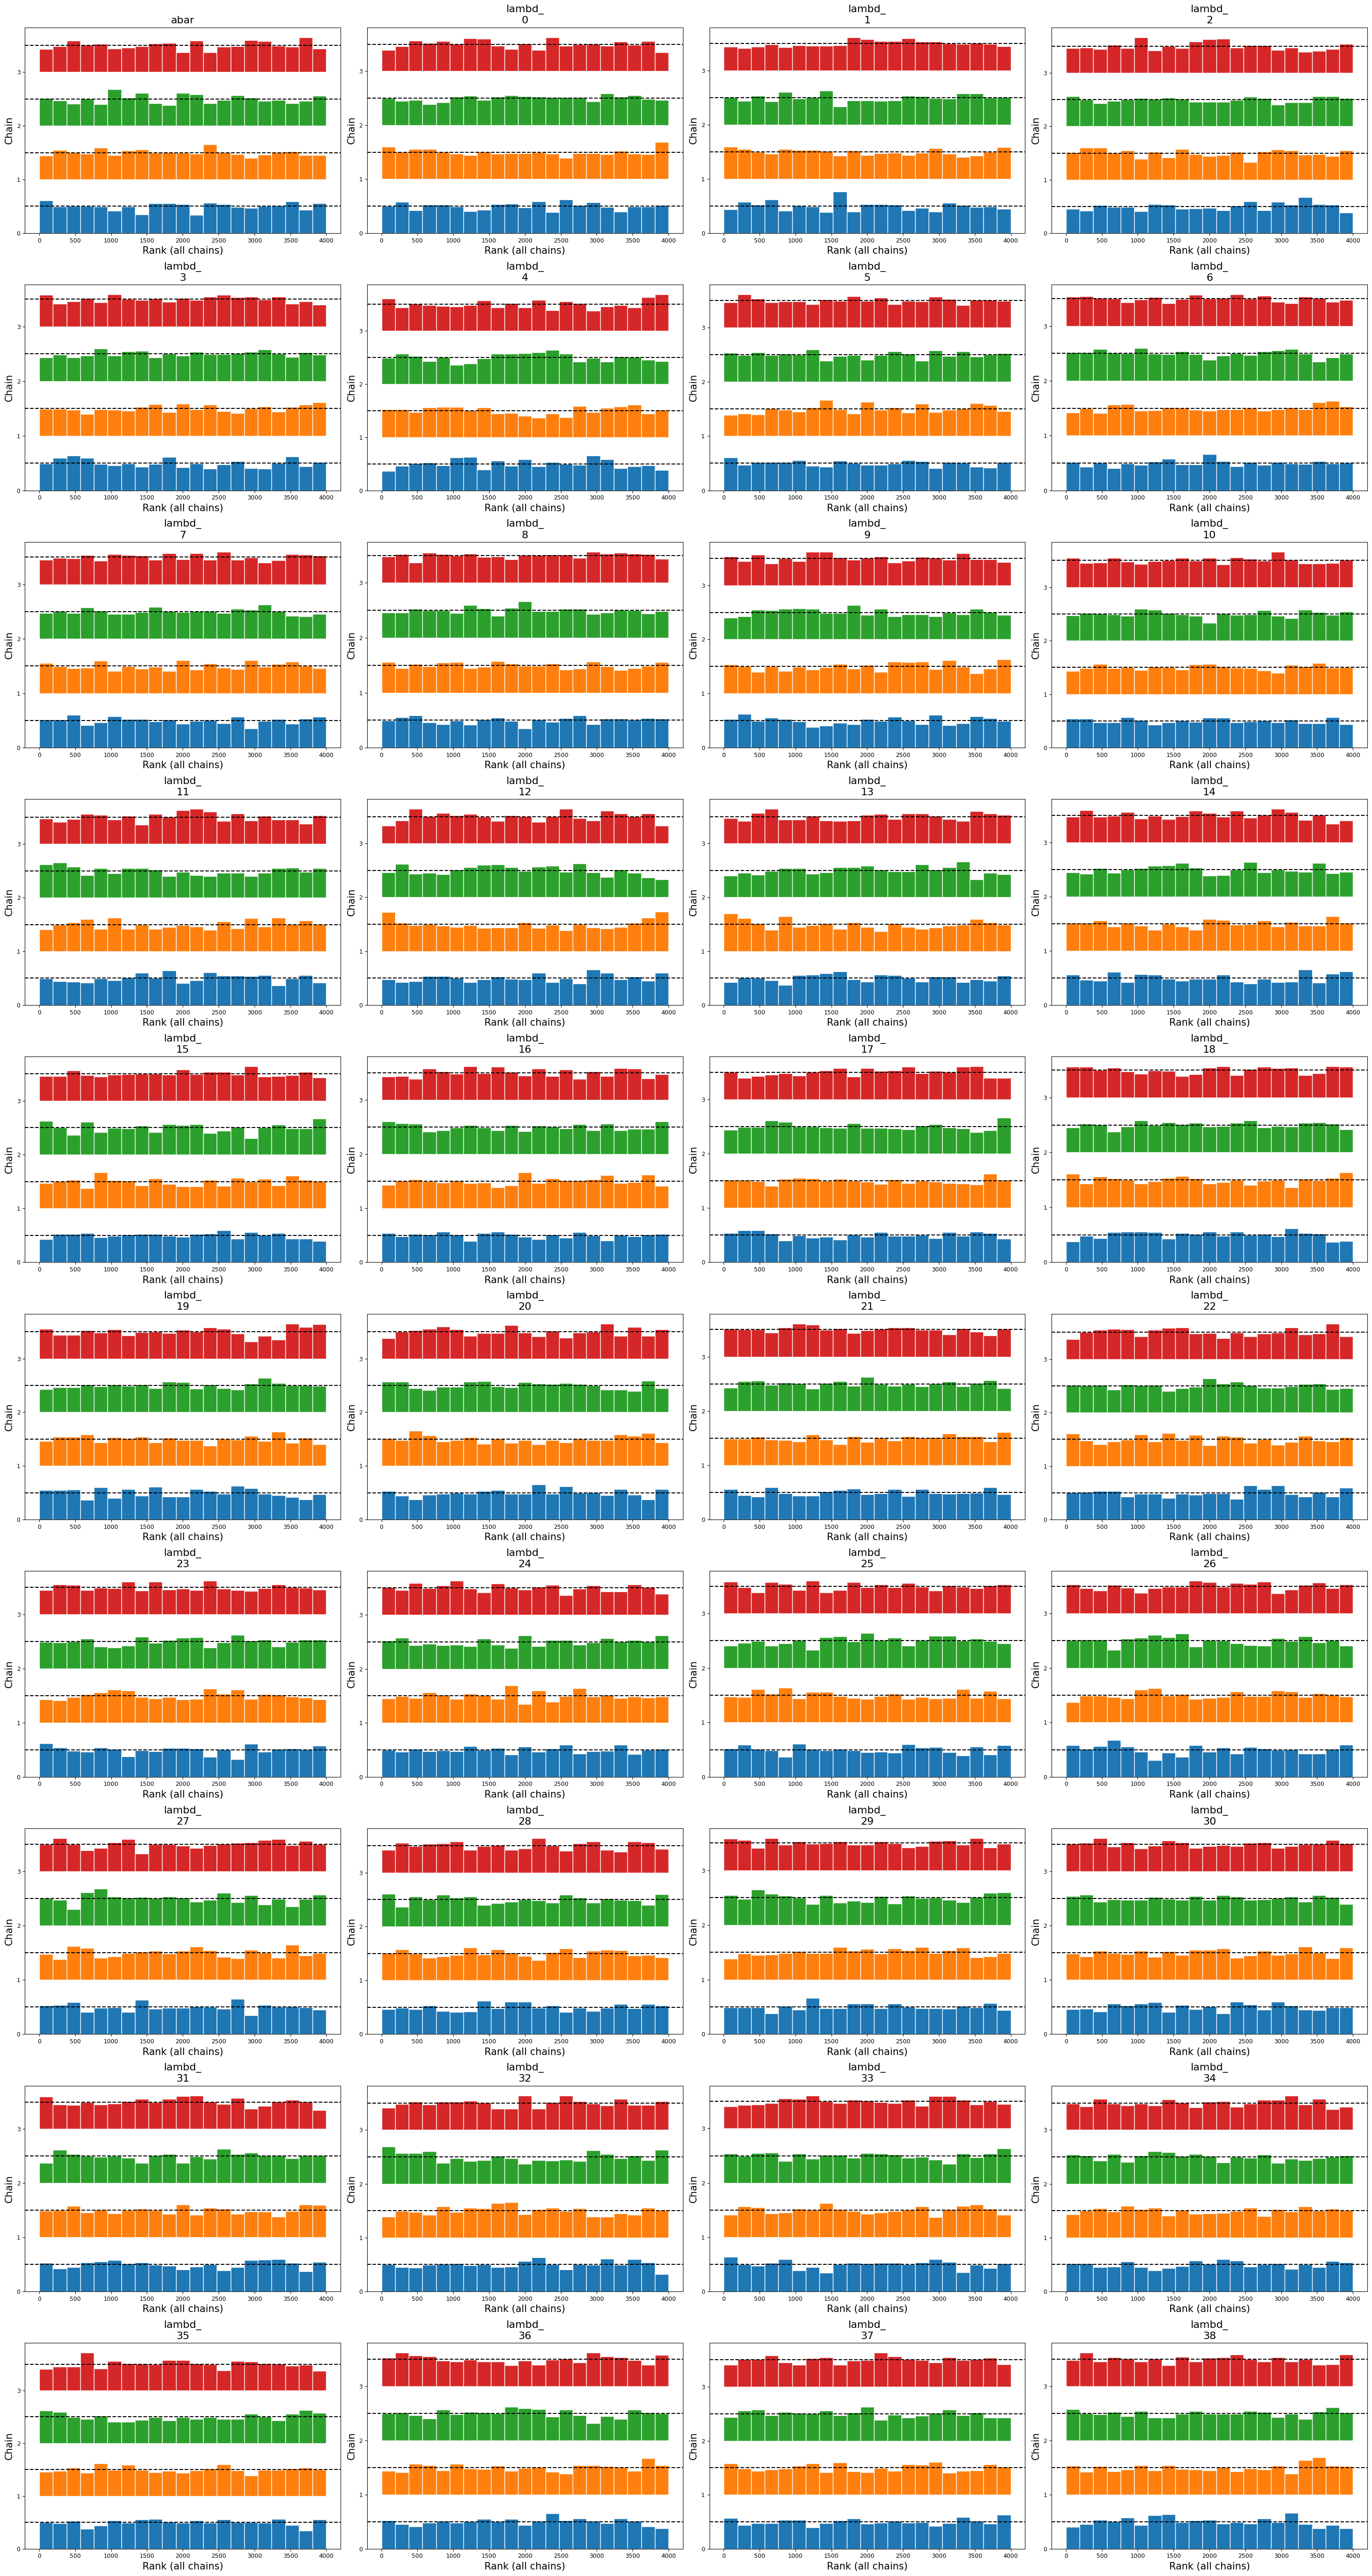

In [484]:
# Check if the sampler worked
az.plot_trace(inference_partial, var_names=['abar', 'lambd_', 'mu_rate'], compact=True)
az.plot_rank(inference_partial, var_names=['abar', 'lambd_', 'mu_rate']) # Check for each variable for more detail
plt.tight_layout()

In [485]:
az.summary(inference_partial, var_names=['abar','lambd_','mu_rate', 'mu'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
abar,1.350,0.136,1.090,1.598,0.002,0.002,3708.0,3198.0,1.0
lambd_[0],10.392,0.616,9.283,11.539,0.008,0.006,6114.0,3192.0,1.0
lambd_[1],5.539,0.478,4.640,6.416,0.006,0.004,6697.0,3015.0,1.0
lambd_[2],2.539,0.384,1.819,3.245,0.006,0.004,4417.0,2945.0,1.0
lambd_[3],2.815,0.343,2.207,3.491,0.005,0.003,5566.0,3095.0,1.0
...,...,...,...,...,...,...,...,...,...
mu[1945],27.300,1.015,25.427,29.151,0.013,0.010,5754.0,2726.0,1.0
mu[1946],27.300,1.015,25.427,29.151,0.013,0.010,5754.0,2726.0,1.0
mu[1947],27.300,1.015,25.427,29.151,0.013,0.010,5754.0,2726.0,1.0
mu[1948],27.300,1.015,25.427,29.151,0.013,0.010,5754.0,2726.0,1.0


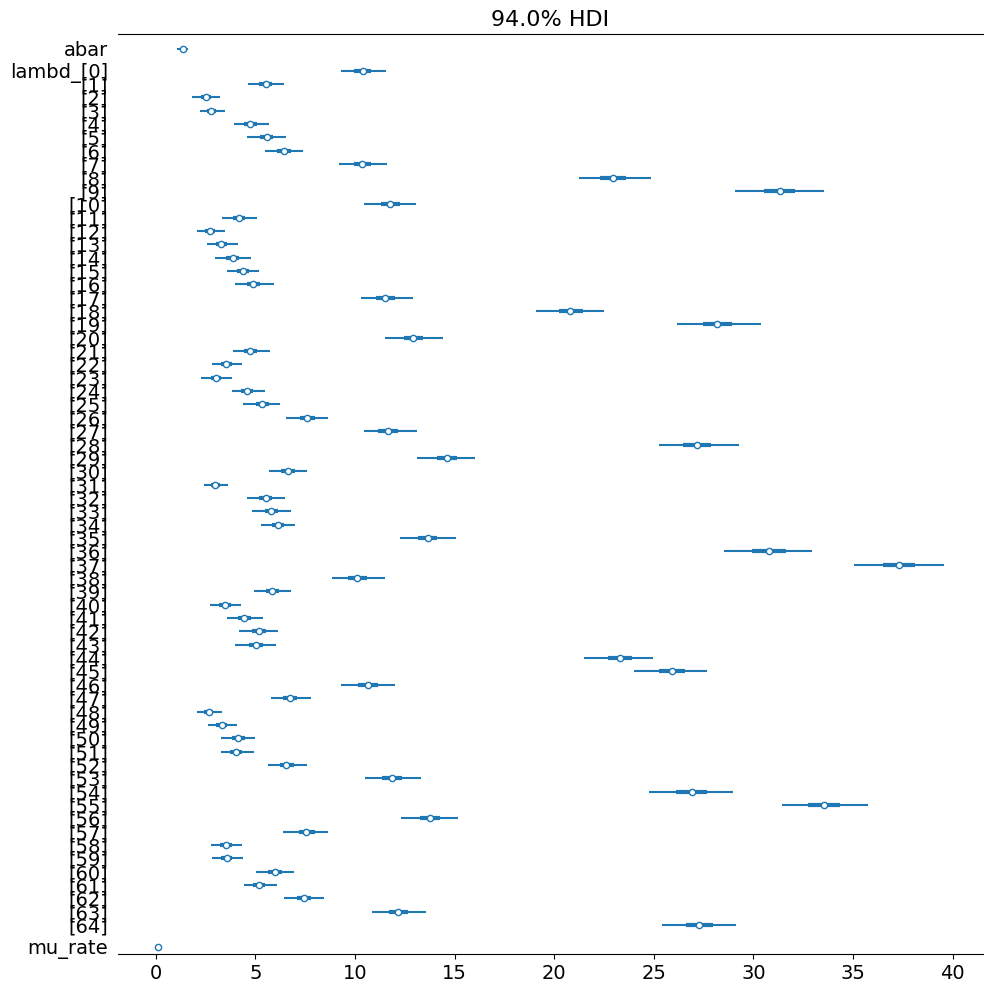

In [486]:
az.plot_forest(inference_partial, var_names=['abar', 'lambd_', 'mu_rate'], combined=True, figsize=(10, 10))
plt.tight_layout()

/Users/giorgikukishvili/anaconda3/lib/python3.11/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (67) in plot_posterior, generating only 40 plots
  warnings.warn(


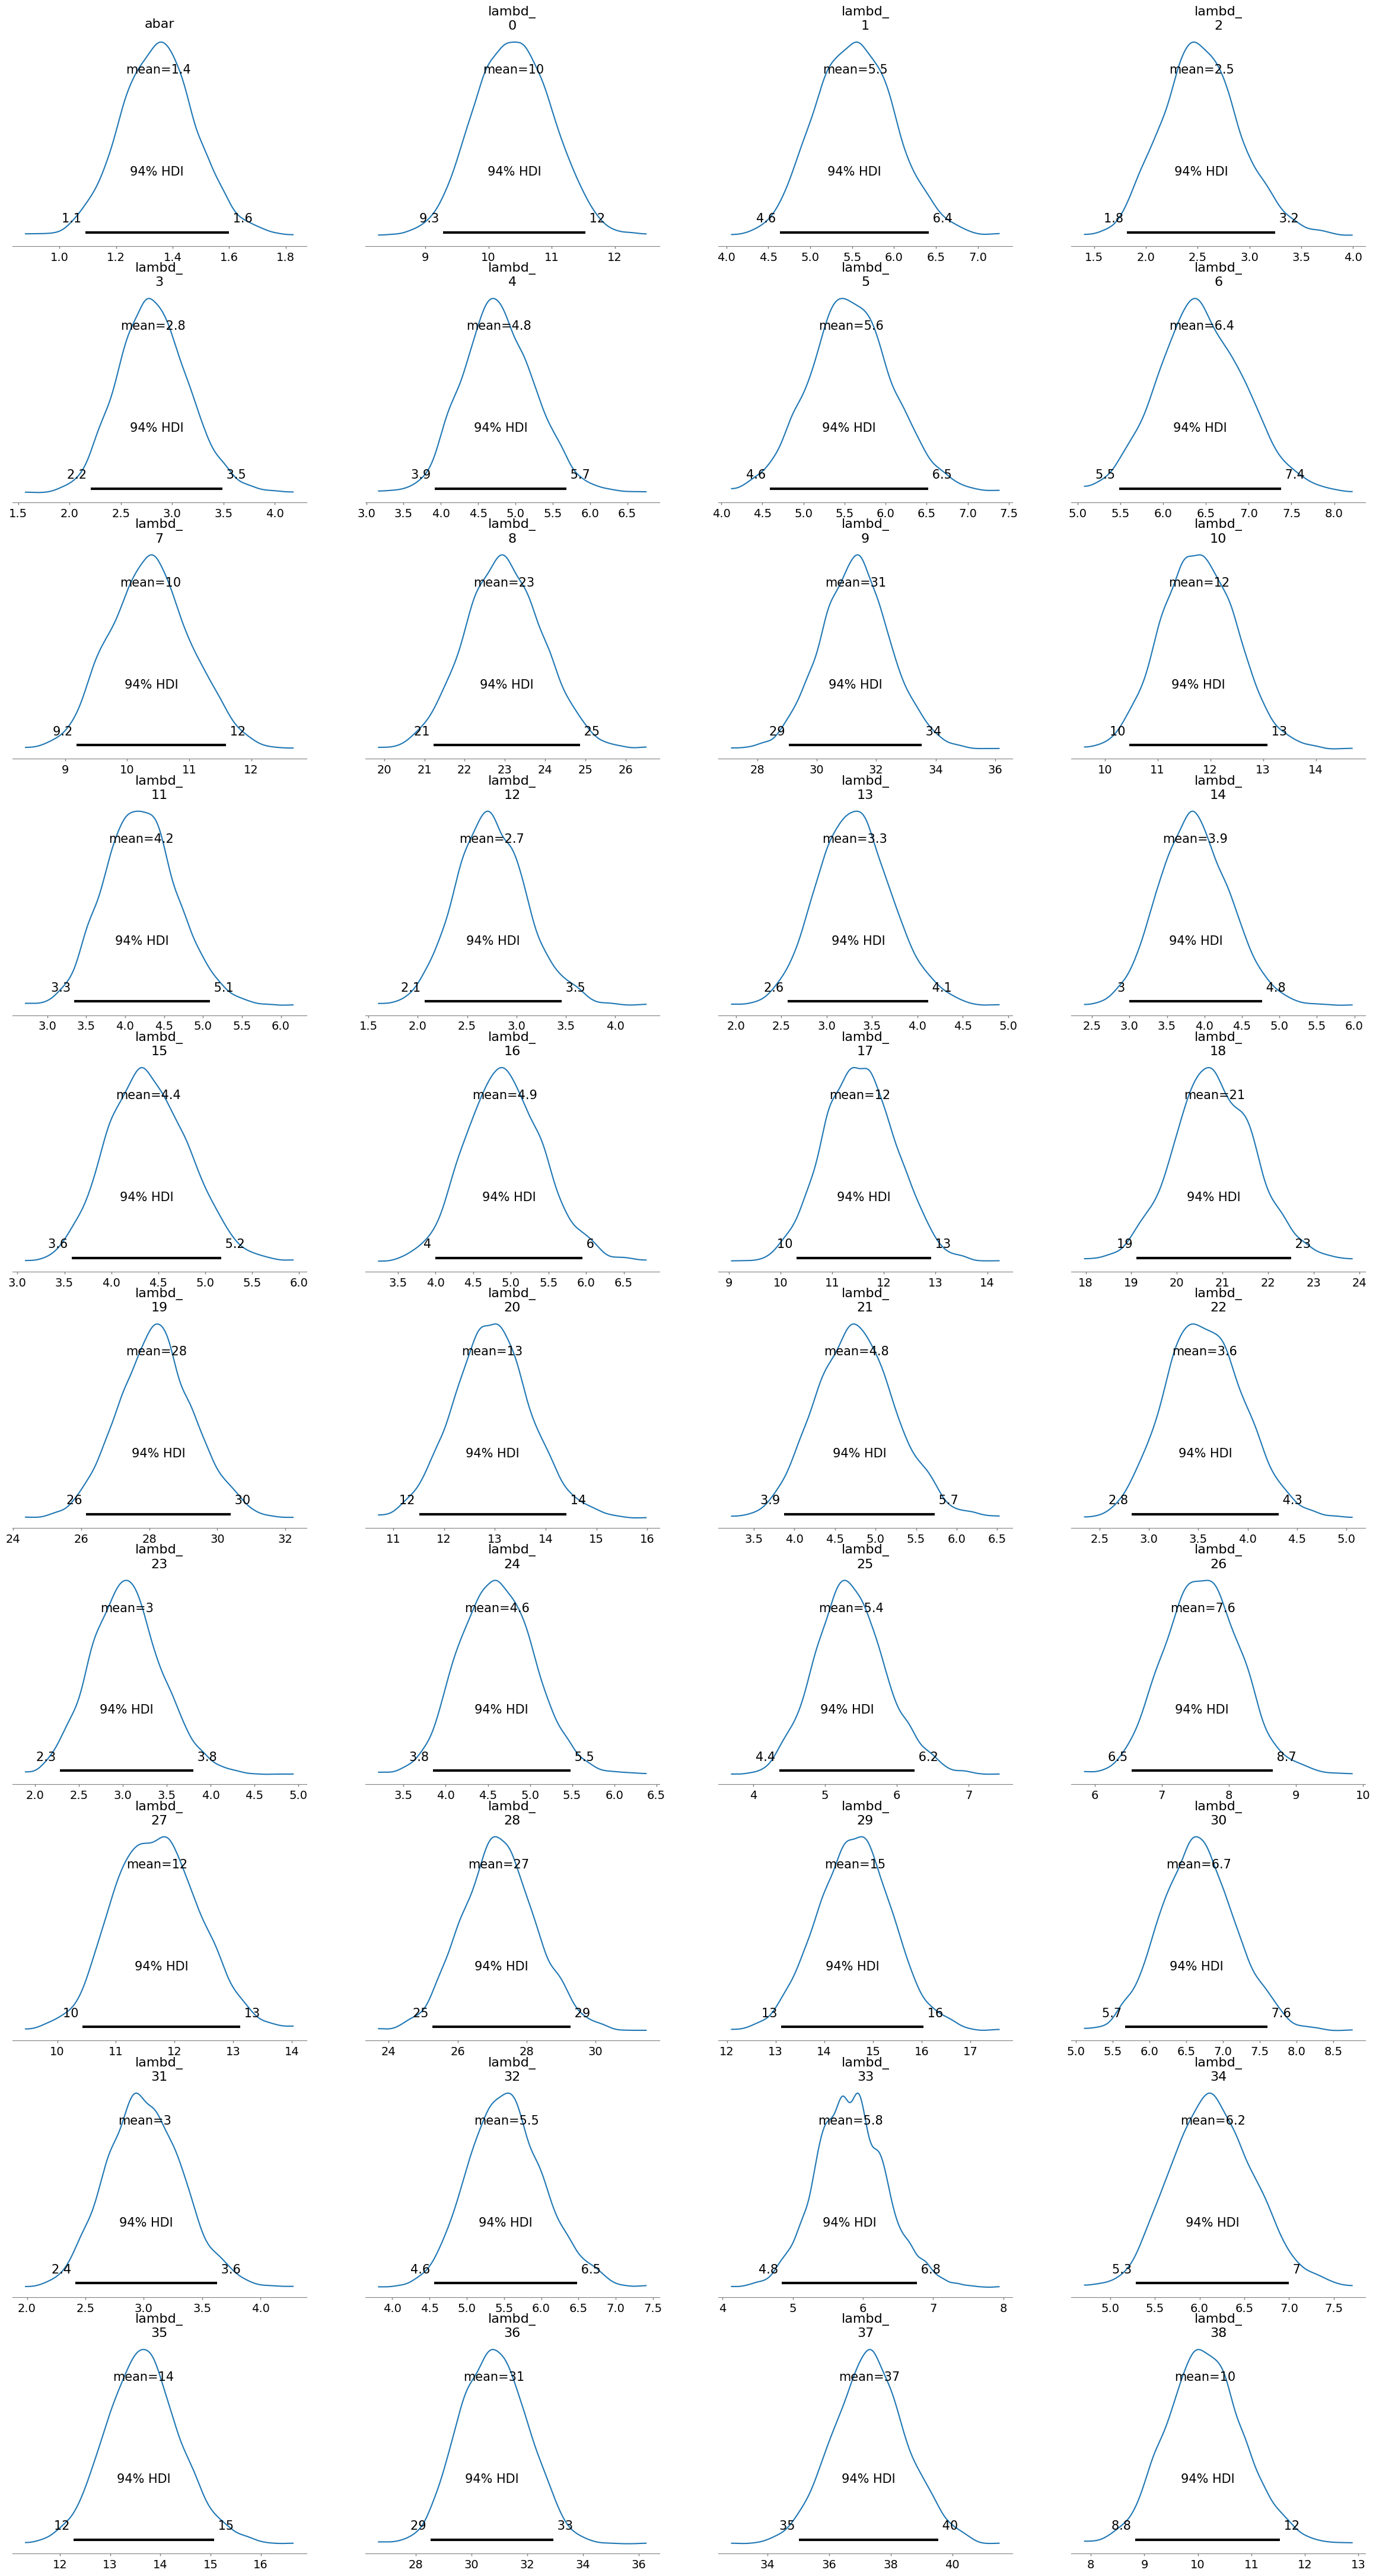

In [487]:
pm.plot_posterior(inference_partial, var_names=['abar', 'lambd_', 'mu_rate'])
plt.show()

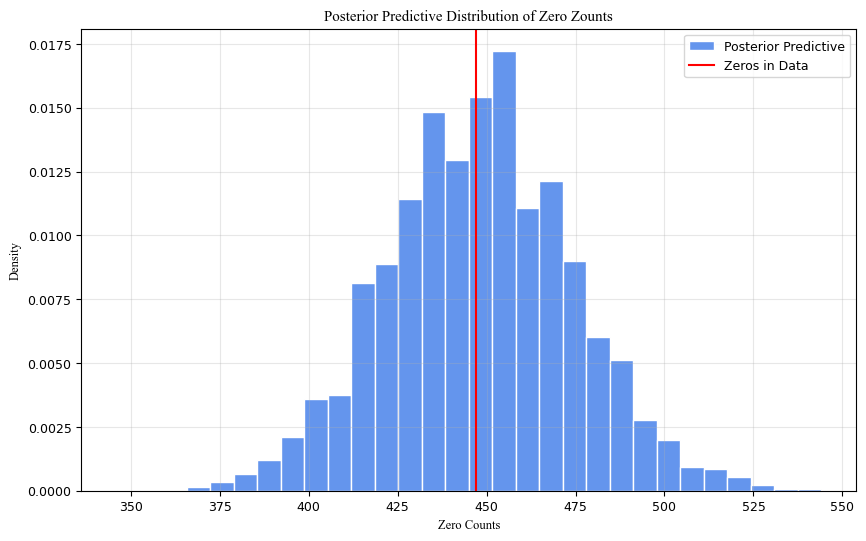

In [488]:
# Code modified from Session 8.2 Codebook: "Poisson vs Zero-Inflated-Poisson"
# Posterior predictive samples
partial_posterior_samples_zeros = (inference_partial.posterior_predictive.y_obs.values == 0).sum(axis=2).flat 
plt.figure(figsize=(10,6))
plt.title('Posterior Predictive Distribution of Zero Zounts', font)
plt.hist(partial_posterior_samples_zeros, color='cornflowerblue', edgecolor='white', bins=30, density=True, label='Posterior Predictive')
plt.axvline((df2['Counts'] == 0).sum(), color='red', label='Zeros in Data')
plt.xlabel('Zero Counts', font)
plt.ylabel('Density', font)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

Mean number of visits: 8
95% Interval: [ 0. 35.]
Maximum number of visits: 74


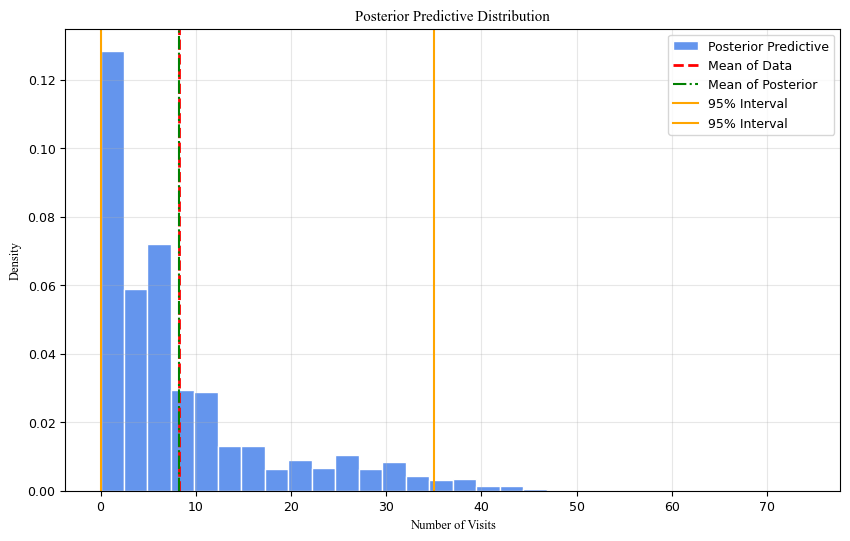

In [494]:
# Posterior predictive statistics
print(f'Mean number of visits: {round(np.mean(inference_partial.posterior_predictive.y_obs.values))}')  
print(f'95% Interval: {np.percentile(inference_partial.posterior_predictive.y_obs.values, (2.5, 97.5))}')
print(f'Maximum number of visits: {inference_partial.posterior_predictive.y_obs.values.max()}')
partial_posterior_samples = inference_partial.posterior_predictive.y_obs.values.flatten()
plt.figure(figsize=(10,6))
plt.title('Posterior Predictive Distribution', font)
plt.hist(partial_posterior_samples, bins=30, color='cornflowerblue', edgecolor='white', density=True, label='Posterior Predictive')
plt.axvline(np.mean(df2['Counts']), color='red', label='Mean of Data', linewidth=2, linestyle='--')
plt.axvline(np.mean(inference_partial.posterior_predictive.y_obs.values), color='green', label='Mean of Posterior ', linestyle='dashdot')
plt.axvline(np.percentile(inference_partial.posterior_predictive.y_obs.values, 2.5), color='orange', label='95% Interval', linestyle='solid')
plt.axvline(np.percentile(inference_partial.posterior_predictive.y_obs.values, 97.5), color='orange', label='95% Interval', linestyle='solid')
plt.xlabel('Number of Visits', font)
plt.ylabel('Density', font)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

False


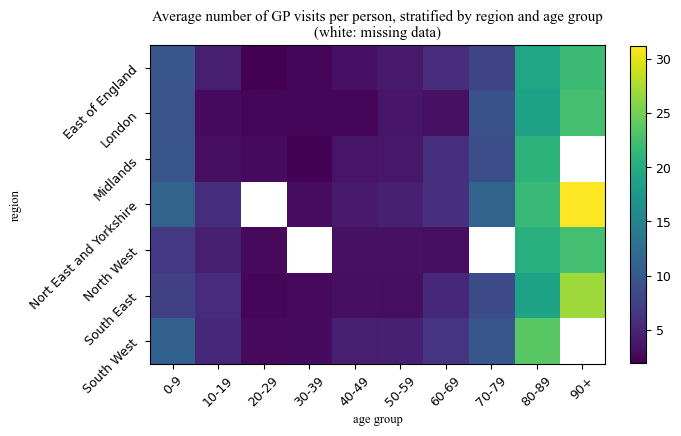

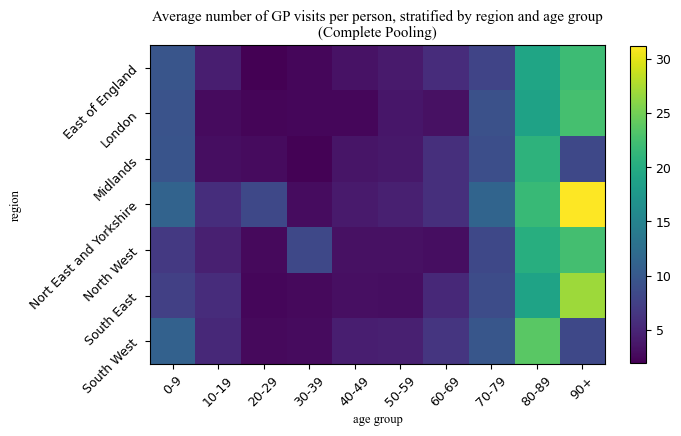

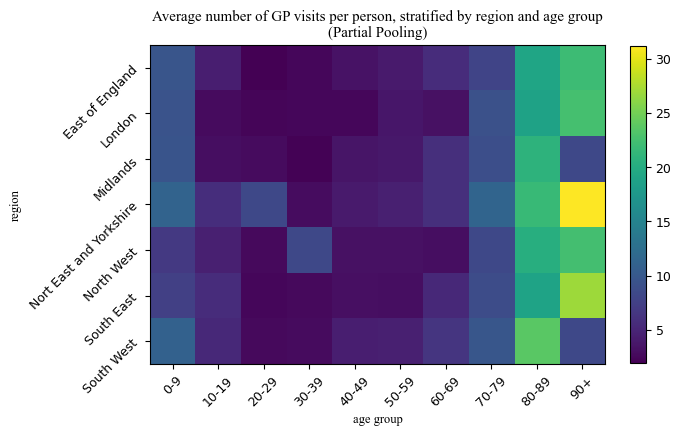

In [490]:

# Find and fill in the NA values by sampling random values from posterior predictive
# Now we can re-aggregate the data and visualize the results with predicted values
# Replace the missing values with the sampled values
filled_data_partial = raw_data.copy()
filled_data_partial[np.isnan(filled_data_partial)] = np.mean(inference_partial.posterior_predictive.y_obs.values)
# If it worked correctly there won't be  any NaN values
print(np.isnan(filled_data_partial).any())

# Visaulize the original raw data
plt.figure()
plt.title('Average number of GP visits per person, stratified by region and age group\n(white: missing data)', font)
plt.xlabel('age group', font)
plt.ylabel('region', font)
plt.imshow(raw_data.mean(axis=2))
plt.colorbar(fraction=0.032)
plt.xticks(range(len(ages)), ages, rotation=45)
plt.yticks(range(len(regions)), regions, rotation=45)
plt.show()

# Complete
plt.figure()
plt.title('Average number of GP visits per person, stratified by region and age group\n(Complete Pooling)', font)
plt.xlabel('age group', font)
plt.ylabel('region', font)
plt.imshow(filled_data.mean(axis=2))
plt.colorbar(fraction=0.032)
plt.xticks(range(len(ages)), ages, rotation=45)
plt.yticks(range(len(regions)), regions, rotation=45)
plt.show()

# Partial
plt.figure()
plt.title('Average number of GP visits per person, stratified by region and age group\n(Partial Pooling)', font)
plt.xlabel('age group', font)
plt.ylabel('region', font)
plt.imshow(filled_data_partial.mean(axis=2))
plt.colorbar(fraction=0.032)
plt.xticks(range(len(ages)), ages, rotation=45)
plt.yticks(range(len(regions)), regions, rotation=45)
plt.show()

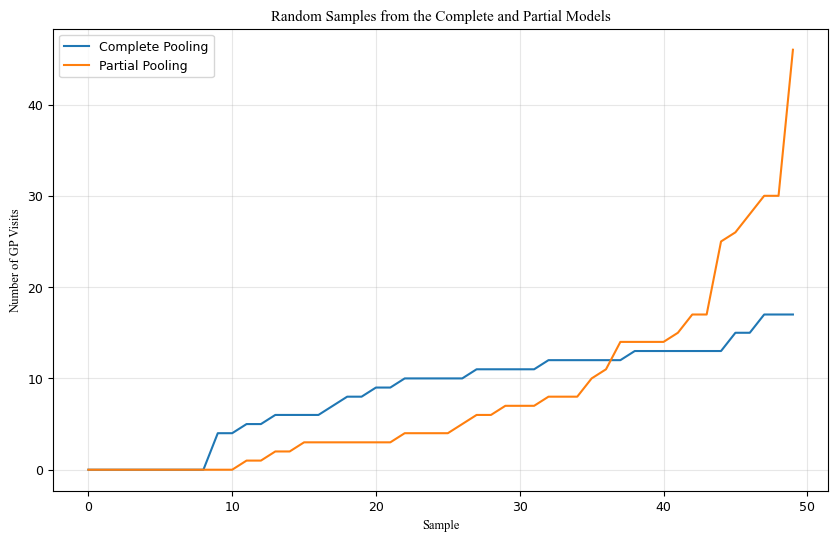

In [491]:
# Samples from two models
random.seed(random_seed)
plt.figure(figsize=(10,6))
complete_pool_samples = random.sample(list(inference.posterior_predictive.y_obs.values.flatten()),50)
partial_pool_samples = random.sample(list(inference_partial.posterior_predictive.y_obs.values.flatten()),50)
sorted_complete = complete_pool_samples.sort() 
sorted_partial = partial_pool_samples.sort()
x = np.linspace(0,20)
plt.title('Random Samples from the Complete and Partial Models', font)
plt.xlabel('Sample', font)
plt.ylabel('Number of GP Visits', font)
plt.plot(complete_pool_samples, label='Complete Pooling')
plt.plot(partial_pool_samples, label='Partial Pooling')
plt.legend()
plt.grid(alpha=0.3)

/Users/giorgikukishvili/anaconda3/lib/python3.11/site-packages/arviz/stats/stats.py:805: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
partial,0,12408.652727,255.490162,0.000000,0.872889,225.792189,0.000000,True,deviance
complete,1,21935.853002,13.184472,9527.200275,0.127111,669.036986,564.893357,False,deviance


<Axes: title={'center': 'Model comparison\nlower is better'}, xlabel='elpd_loo (deviance)', ylabel='ranked models'>

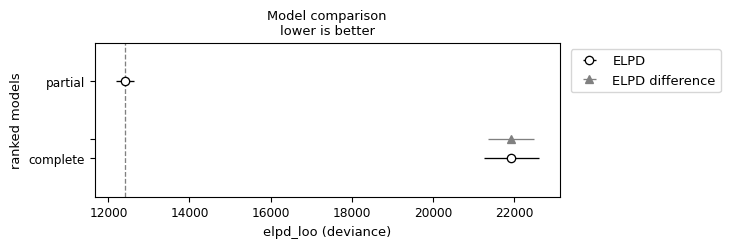

In [492]:
# Both models are disaggregated so we can compare the results using loo
results = az.compare({'complete': inference, 'partial': inference_partial}, ic='loo', scale='deviance') 
display(results)
az.plot_compare(results)